<a href="https://colab.research.google.com/github/pinzar14/Procesamiento_digital_de_seniales/blob/main/3PD__Seniales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER 3 PROCESAMIENTO DIGITAL DE SEÑALES

### PARTE #1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.fft import fft, fftfreq
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Parámetros
fs = 1000  # Frecuencia de muestreo (Hz)
T = 1      # Duración de la señal (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Parte 1: Suma de cosenos de varias frecuencias
frecuencias = [0, 25, 50, 75, 100, 125, 150, 175, 200]
suma_cos = sum(np.cos(2 * np.pi * f * t) for f in frecuencias)

# FFT de la suma de cosenos
N = len(t)
fft_suma = fft(suma_cos)
freqs = fftfreq(N, 1/fs)

# Parte 2: Chirp (frecuencia de 0 a 100 Hz)
f0 = 0
f1 = 100
chirp_cos = np.cos(2 * np.pi * (f0 * t + ((f1 - f0) / (2 * T)) * t**2))

# FFT del chirp
fft_chirp = fft(chirp_cos)

# Parte 3: Convolución
conv_result = convolve(suma_cos, chirp_cos, mode='full')
t_conv = np.linspace(0, 2*T, len(conv_result), endpoint=False)

# FFT de la convolución
fft_conv = fft(conv_result)
freqs_conv = fftfreq(len(conv_result), 1/fs)

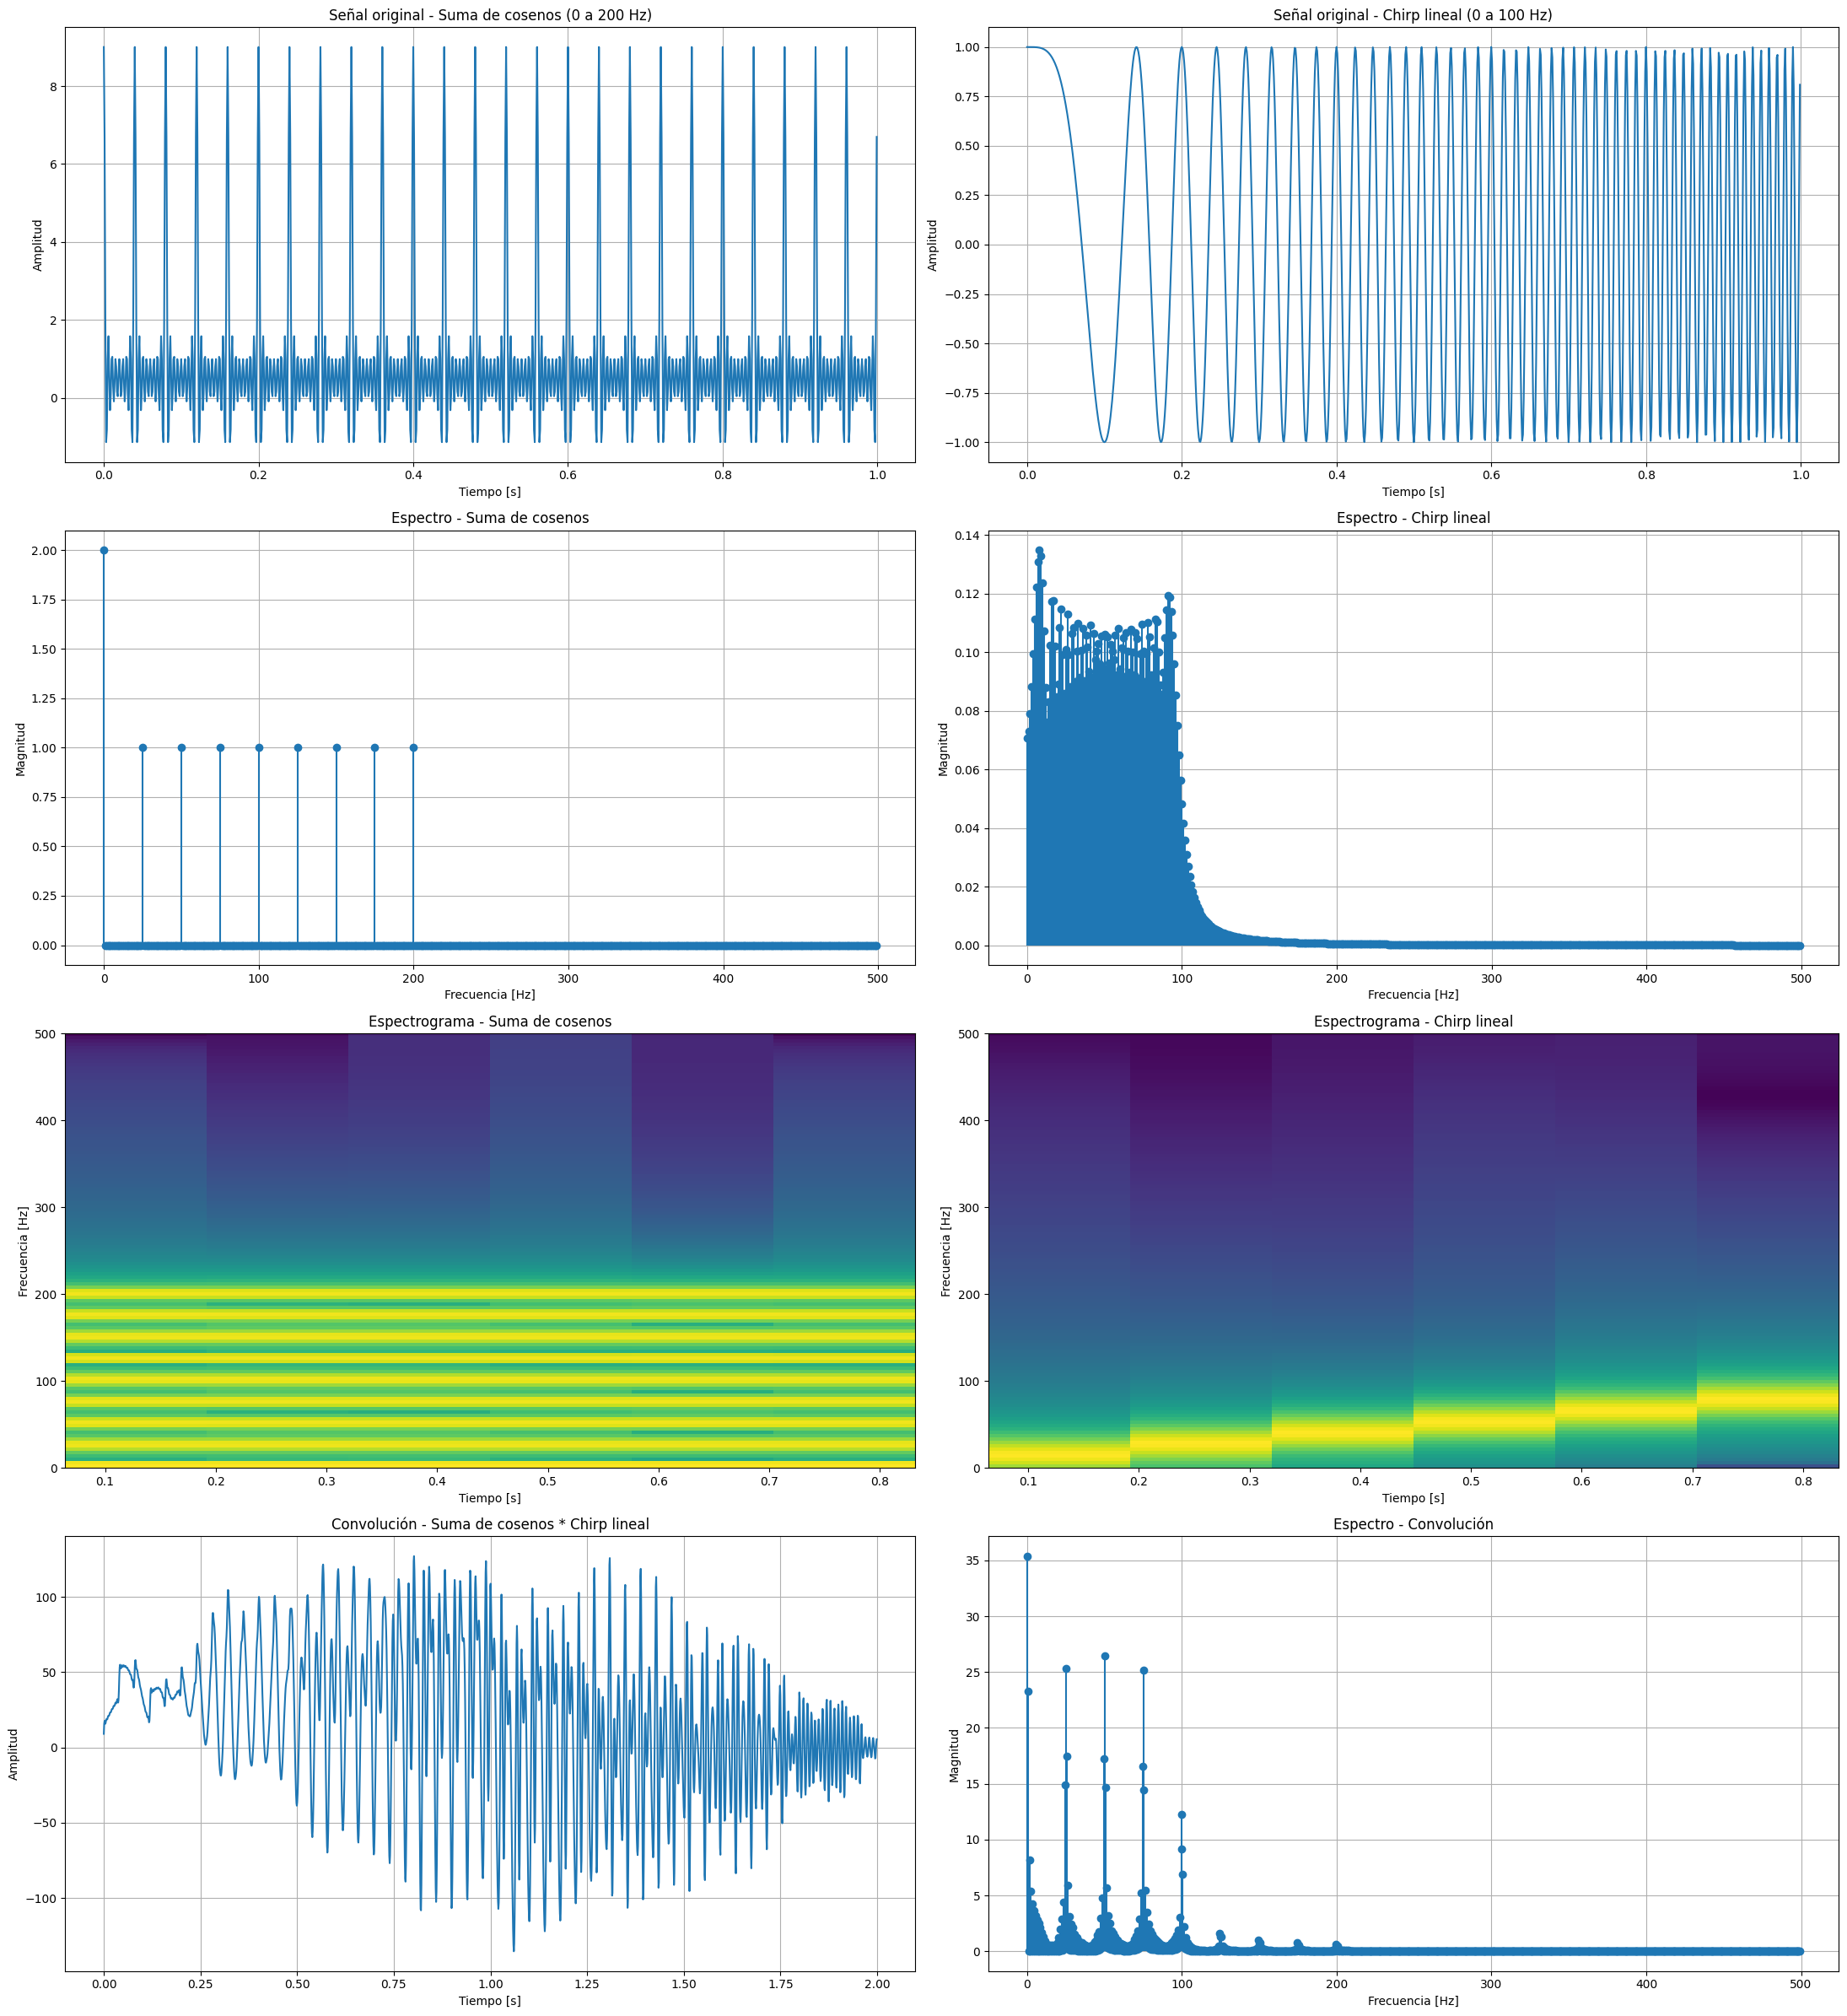

In [3]:
# Figura con todas las gráficas
fig, axs = plt.subplots(4, 2, figsize=(22, 24))

# Señal original - Suma de cosenos
axs[0, 0].plot(t, suma_cos)
axs[0, 0].set_title("Señal original - Suma de cosenos (0 a 200 Hz)")
axs[0, 0].set_xlabel("Tiempo [s]")
axs[0, 0].set_ylabel("Amplitud")
axs[0, 0].grid()

# Señal original - Chirp
axs[0, 1].plot(t, chirp_cos)
axs[0, 1].set_title("Señal original - Chirp lineal (0 a 100 Hz)")
axs[0, 1].set_xlabel("Tiempo [s]")
axs[0, 1].set_ylabel("Amplitud")
axs[0, 1].grid()

# Espectro - Suma de cosenos
axs[1, 0].stem(freqs[:N//2], 2.0/N * np.abs(fft_suma[:N//2]), basefmt=" ")
axs[1, 0].set_title("Espectro - Suma de cosenos")
axs[1, 0].set_xlabel("Frecuencia [Hz]")
axs[1, 0].set_ylabel("Magnitud")
axs[1, 0].grid()

# Espectro - Chirp
axs[1, 1].stem(freqs[:N//2], 2.0/N * np.abs(fft_chirp[:N//2]), basefmt=" ")
axs[1, 1].set_title("Espectro - Chirp lineal")
axs[1, 1].set_xlabel("Frecuencia [Hz]")
axs[1, 1].set_ylabel("Magnitud")
axs[1, 1].grid()

# Espectrograma - Suma de cosenos
axs[2, 0].specgram(suma_cos, Fs=fs, NFFT=256, noverlap=128, cmap='viridis')
axs[2, 0].set_title("Espectrograma - Suma de cosenos")
axs[2, 0].set_xlabel("Tiempo [s]")
axs[2, 0].set_ylabel("Frecuencia [Hz]")

# Espectrograma - Chirp
axs[2, 1].specgram(chirp_cos, Fs=fs, NFFT=256, noverlap=128, cmap='viridis')
axs[2, 1].set_title("Espectrograma - Chirp lineal")
axs[2, 1].set_xlabel("Tiempo [s]")
axs[2, 1].set_ylabel("Frecuencia [Hz]")

# Convolución temporal
axs[3, 0].plot(t_conv, conv_result)
axs[3, 0].set_title("Convolución - Suma de cosenos * Chirp lineal")
axs[3, 0].set_xlabel("Tiempo [s]")
axs[3, 0].set_ylabel("Amplitud")
axs[3, 0].grid()

# Espectro de la convolución
axs[3, 1].stem(freqs_conv[:len(freqs_conv)//2], 2.0/len(conv_result) * np.abs(fft_conv[:len(conv_result)//2]), basefmt=" ")
axs[3, 1].set_title("Espectro - Convolución")
axs[3, 1].set_xlabel("Frecuencia [Hz]")
axs[3, 1].set_ylabel("Magnitud")
axs[3, 1].grid()

plt.tight_layout()
plt.show()


### Implementando widgets

In [11]:

# Parámetros generales
fs = 1000  # Frecuencia de muestreo (Hz)
T = 1      # Duración de la señal (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)
N = len(t)
freqs = fftfreq(N, 1/fs)

# Función principal
def actualizar(f1, rango_freqs, inicio_ventana, ancho_ventana):
    frecs = list(range(rango_freqs[0], rango_freqs[1] + 1, 100))
    suma_cos = sum(np.cos(2 * np.pi * f * t) for f in frecs)
    fft_suma = fft(suma_cos)

    chirp_cos = np.cos(2 * np.pi * ((f1 / (2 * T)) * t**2))
    fft_chirp = fft(chirp_cos)

    conv_result = convolve(suma_cos, chirp_cos, mode='full')
    t_conv = np.linspace(0, 2*T, len(conv_result), endpoint=False)
    fft_conv = fft(conv_result)
    freqs_conv = fftfreq(len(conv_result), 1/fs)

    idx_inicio = int(inicio_ventana * fs)
    idx_fin = int(min(idx_inicio + ancho_ventana * fs, len(conv_result)))
    ventana = conv_result[idx_inicio:idx_fin]
    t_ventana = t_conv[idx_inicio:idx_fin]
    potencia_ventana = np.mean(ventana**2)

    fig, axs = plt.subplots(5, 2, figsize=(22, 30))

    axs[0, 0].plot(t, suma_cos)
    axs[0, 0].set_title(f"Suma de cosenos ({frecs} Hz)")
    axs[0, 0].grid()

    axs[0, 1].plot(t, chirp_cos)
    axs[0, 1].set_title(f"Chirp lineal (0 a {f1} Hz)")
    axs[0, 1].grid()

    axs[1, 0].stem(freqs[:N//2], 2.0/N * np.abs(fft_suma[:N//2]), basefmt=" ")
    axs[1, 0].set_title("Espectro - Suma de cosenos")
    axs[1, 0].grid()

    axs[1, 1].stem(freqs[:N//2], 2.0/N * np.abs(fft_chirp[:N//2]), basefmt=" ")
    axs[1, 1].set_title("Espectro - Chirp")
    axs[1, 1].grid()

    axs[2, 0].specgram(suma_cos, Fs=fs, NFFT=256, noverlap=128, cmap='viridis')
    axs[2, 0].set_title("Espectrograma - Suma de cosenos")

    axs[2, 1].specgram(chirp_cos, Fs=fs, NFFT=256, noverlap=128, cmap='viridis')
    axs[2, 1].set_title("Espectrograma - Chirp lineal")

    axs[3, 0].plot(t_conv, conv_result, label="Convolución completa")
    axs[3, 0].plot(t_ventana, ventana, color='red', linewidth=2, label=f"Ventana seleccionada\nPotencia = {potencia_ventana:.3f}")
    axs[3, 0].legend()
    axs[3, 0].set_title("Convolución y Ventana seleccionada")
    axs[3, 0].grid()

    axs[3, 1].stem(freqs_conv[:len(conv_result)//2], 2.0/len(conv_result) * np.abs(fft_conv[:len(conv_result)//2]), basefmt=" ")
    axs[3, 1].set_title("Espectro - Convolución")
    axs[3, 1].grid()

    # Gráfica final con eje Y secundario para la potencia
    ax1 = axs[4, 0]
    ax2 = ax1.twinx()

    ax1.plot(t_ventana, ventana, label="Señal en ventana", color='blue')
    ax1.fill_between(t_ventana, ventana, alpha=0.3, color='blue')
    ax1.set_ylabel("Amplitud")
    ax1.set_xlabel("Tiempo [s]")
    ax1.grid()

    ax2.hlines(potencia_ventana, t_ventana[0], t_ventana[-1],
               color='red', linestyle='--', linewidth=2,
               label=f"Potencia = {potencia_ventana:.3f}")
    ax2.set_ylabel("Potencia")

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

    ax1.set_title("Señal en ventana seleccionada y potencia")

    axs[4, 1].axis('off')  # Sin uso

    plt.tight_layout()
    plt.show()




In [12]:
# Widgets
slider_f1 = widgets.IntSlider(value=200, min=10, max=500, step=10, description='frecuencia Chirp [Hz]')
slider_rango = widgets.IntRangeSlider(value=[0, 100], min=0, max=500, step=25, description='Rango cosenos [Hz]')
slider_inicio = widgets.FloatSlider(value=0.0, min=0.0, max=1.5, step=0.01, description='Inicio ventana [s]')
slider_ancho = widgets.FloatSlider(value=0.2, min=0.01, max=1.0, step=0.01, description='Ancho ventana [s]')

ui = widgets.VBox([slider_rango, slider_f1, slider_inicio, slider_ancho])
out = widgets.interactive_output(actualizar, {
    'f1': slider_f1,
    'rango_freqs': slider_rango,
    'inicio_ventana': slider_inicio,
    'ancho_ventana': slider_ancho
})

display(ui, out)

Output()